In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import RobustScaler


In [59]:
# Chargement du dataset
df = pd.read_csv('metrics_dataset.csv')

# Aperçu des 5 premières lignes
df.head()

,timestamp,restarts,cpu,memory,net_tx,net_rx,label
0,2025-05-31T13:29:15.909462,21,2.718602,1.475078e+09,56543.379375,75897.256662,normal
1,2025-05-31T13:29:25.983756,21,2.923115,1.072476e+09,73571.786432,82516.245167,normal
2,2025-05-31T13:31:22.742969,21,3.060250,1.192731e+09,77178.765515,66844.052103,normal
3,2025-05-31T13:31:32.807852,21,3.121569,1.291049e+09,92443.204075,72657.879052,normal
4,2025-05-31T13:31:42.868335,21,2.739631,1.248582e+09,129747.178167,77503.513799,normal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  662 non-null    object 
 1   restarts   662 non-null    int64  
 2   cpu        662 non-null    float64
 3   memory     662 non-null    float64
 4   net_tx     662 non-null    float64
 5   net_rx     662 non-null    float64
 6   label      662 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 36.3+ KB


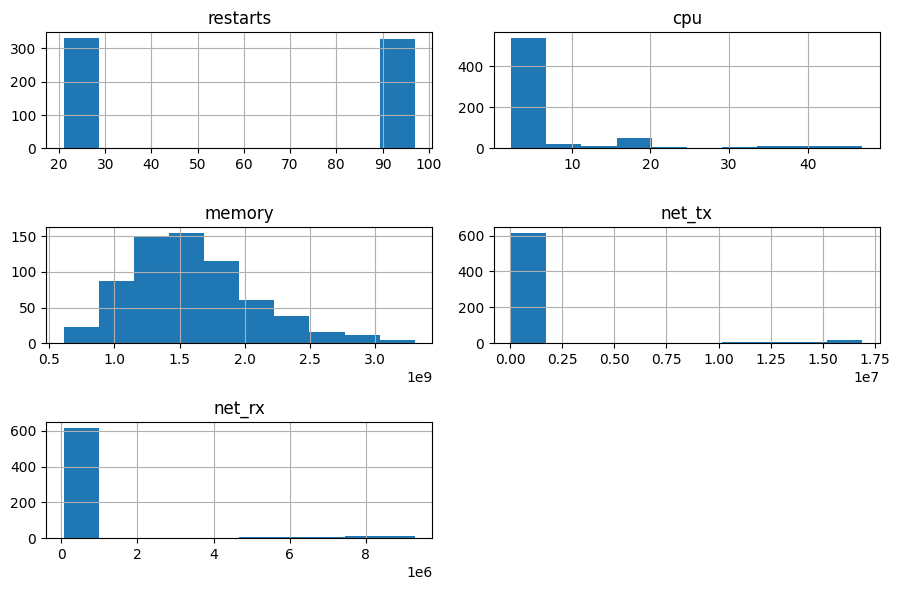

In [60]:
# Infos de base sur le dataset
df.info()

# Statistiques descriptives
df.describe()

# Vérification des valeurs manquantes
df.isnull().sum()

# Distribution des colonnes numériques
df.hist(figsize=(9, 6))
plt.tight_layout()
plt.show()


In [61]:
print(f"Lignes avant suppression: {len(df)}")
df = df.drop_duplicates()
print(f"Lignes après suppression: {len(df)}")

Lignes avant suppression: 662
Lignes après suppression: 662


In [62]:
# Conversion du timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], format='ISO8601')
df.head()

,timestamp,restarts,cpu,memory,net_tx,net_rx,label
0,2025-05-31 13:29:15.909462,21,2.718602,1.475078e+09,56543.379375,75897.256662,normal
1,2025-05-31 13:29:25.983756,21,2.923115,1.072476e+09,73571.786432,82516.245167,normal
2,2025-05-31 13:31:22.742969,21,3.060250,1.192731e+09,77178.765515,66844.052103,normal
3,2025-05-31 13:31:32.807852,21,3.121569,1.291049e+09,92443.204075,72657.879052,normal
4,2025-05-31 13:31:42.868335,21,2.739631,1.248582e+09,129747.178167,77503.513799,normal


In [63]:
# Encodage du label
df['label'] = df['label'].map({'normal': 0, 'anomaly': 1})
df.head()

,timestamp,restarts,cpu,memory,net_tx,net_rx,label
0,2025-05-31 13:29:15.909462,21,2.718602,1.475078e+09,56543.379375,75897.256662,0
1,2025-05-31 13:29:25.983756,21,2.923115,1.072476e+09,73571.786432,82516.245167,0
2,2025-05-31 13:31:22.742969,21,3.060250,1.192731e+09,77178.765515,66844.052103,0
3,2025-05-31 13:31:32.807852,21,3.121569,1.291049e+09,92443.204075,72657.879052,0
4,2025-05-31 13:31:42.868335,21,2.739631,1.248582e+09,129747.178167,77503.513799,0


In [66]:
# Normalisation robuste (pour résister aux outliers)
scaler = RobustScaler()
metrics_to_scale = ['cpu', 'memory', 'net_tx', 'net_rx']
df[metrics_to_scale] = scaler.fit_transform(df[metrics_to_scale])
df.head()

,timestamp,restarts,cpu,memory,net_tx,net_rx,label
0,2025-05-31 13:29:15.909462,21,-0.795973,-0.108141,-4.595319,-4.435137,0
1,2025-05-31 13:29:25.983756,21,-0.689387,-0.765725,-4.470362,-4.346536,0
2,2025-05-31 13:31:22.742969,21,-0.617916,-0.569308,-4.443893,-4.556323,0
3,2025-05-31 13:31:32.807852,21,-0.585958,-0.408722,-4.331880,-4.478499,0
4,2025-05-31 13:31:42.868335,21,-0.785013,-0.478085,-4.058136,-4.413636,0


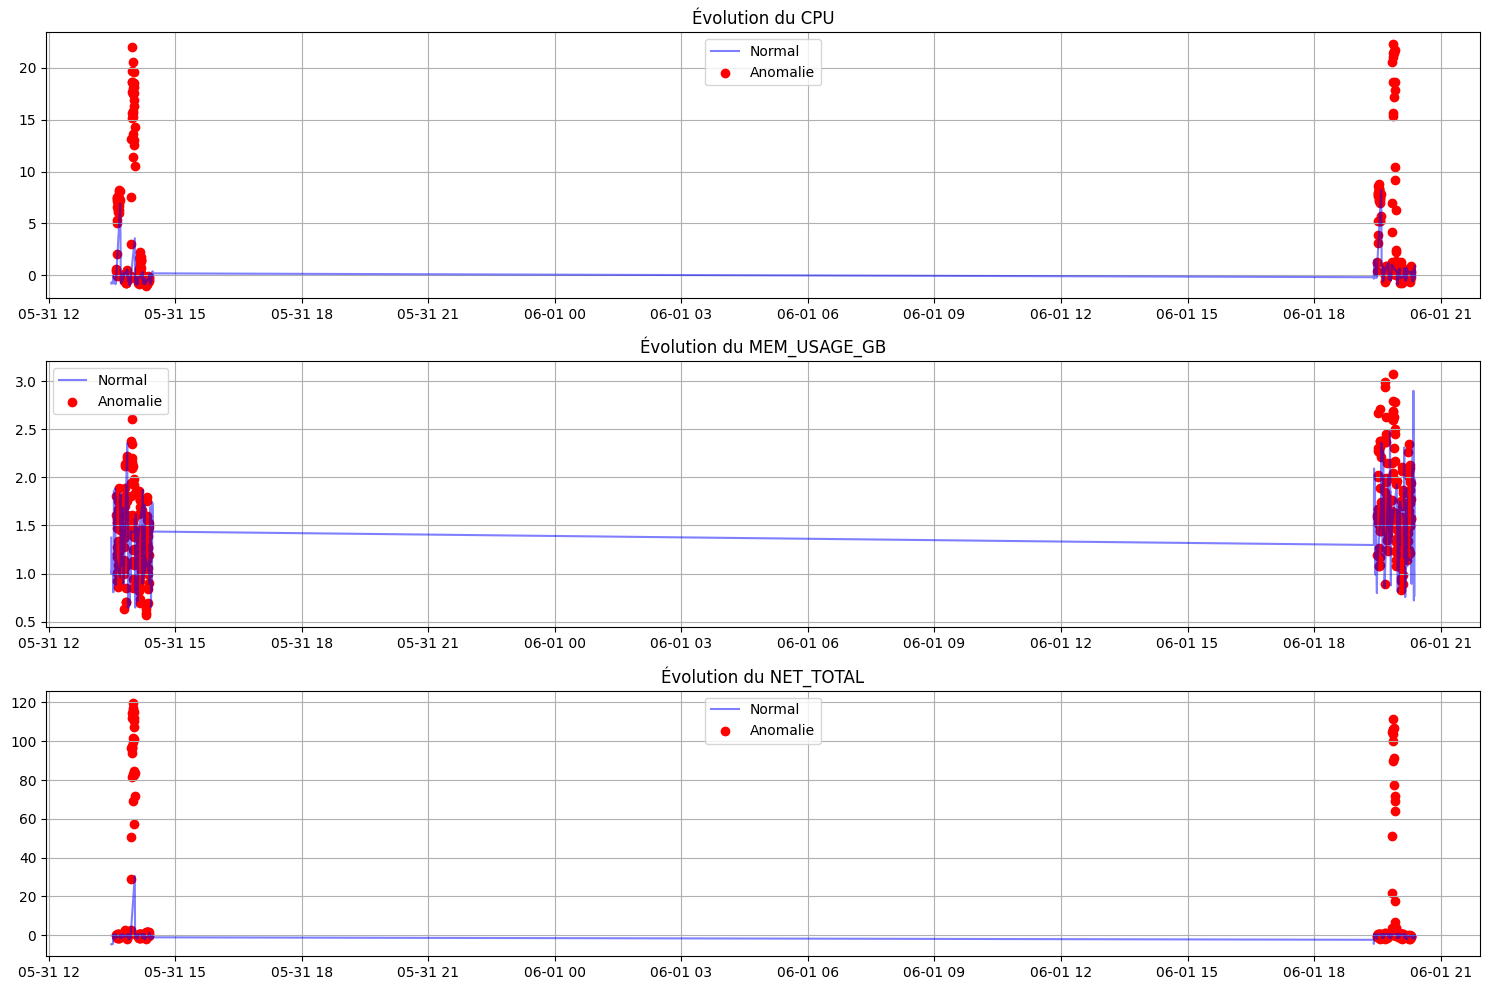

In [ ]:
plt.figure(figsize=(15, 10))

metrics = ['cpu', 'mem_usage_gb', 'net_total']
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 1, i)
    
    # Données normales
    normal_data = df[df['label'] == 'normal']
    plt.plot(normal_data['timestamp'], normal_data[metric], 
             'b-', alpha=0.5, label='Normal')
    
    # Anomalies
    anomaly_data = df[df['label'] == 'anomaly']
    plt.scatter(anomaly_data['timestamp'], anomaly_data[metric], 
                color='red', label='Anomalie')
    
    plt.title(f'Évolution du {metric.upper()}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

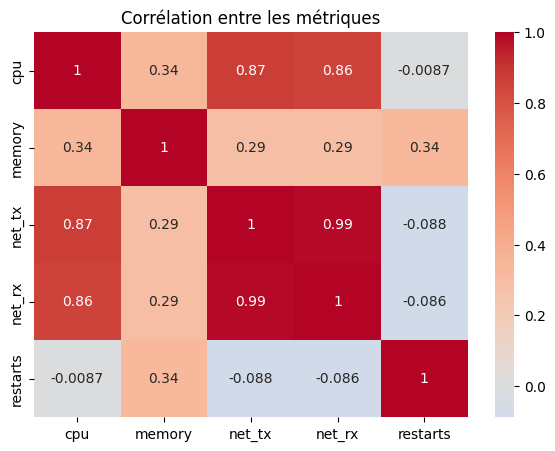

In [ ]:
plt.figure(figsize=(7, 5))
corr_matrix = df[['cpu', 'memory', 'net_tx', 'net_rx', 'restarts']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Corrélation entre les métriques')
plt.show()

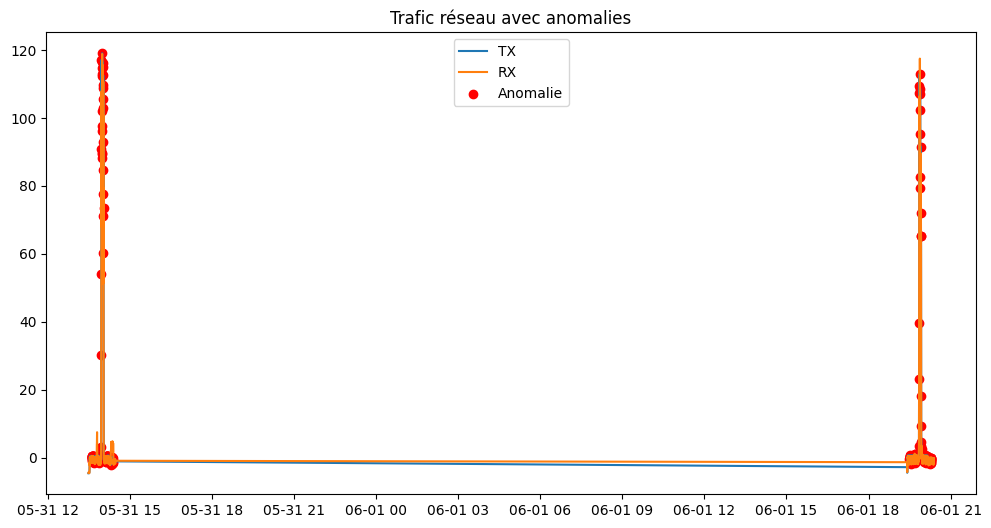

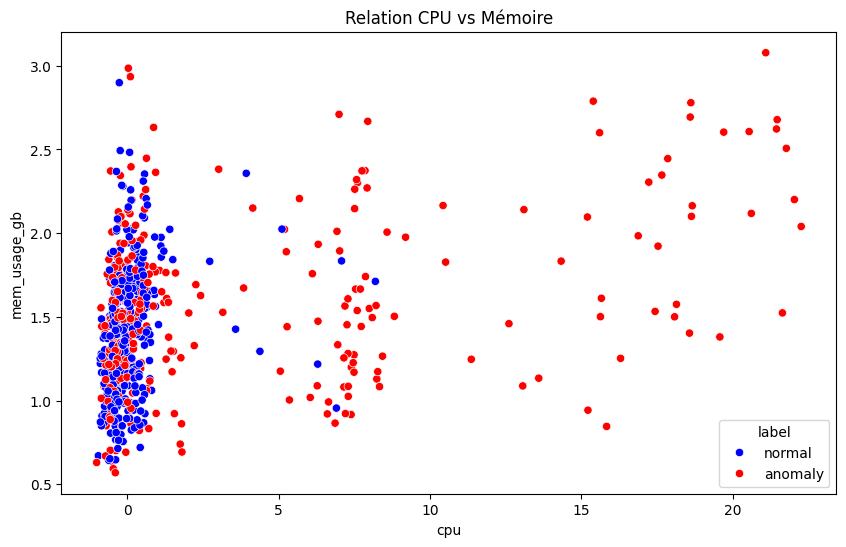

In [ ]:
# Analyse des pics réseau
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['net_tx'], label='TX')
plt.plot(df['timestamp'], df['net_rx'], label='RX')
plt.scatter(df[df['label']=='anomaly']['timestamp'], 
            df[df['label']=='anomaly']['net_tx'], 
            color='red', label='Anomalie')
plt.title('Trafic réseau avec anomalies')
plt.legend()
plt.show()

# Relation CPU/Mémoire
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cpu', y='mem_usage_gb', hue='label', 
                data=df, palette=['blue', 'red'])
plt.title('Relation CPU vs Mémoire')
plt.show()

In [ ]:
anomaly_stats = df[df['label']=='anomaly'][metrics_to_scale].describe()
normal_stats = df[df['label']=='normal'][metrics_to_scale].describe()

print("=== Statistiques des Anomalies ===")
print(anomaly_stats)

print("\n=== Ratios Anomalie/Normal ===")
for metric in metrics_to_scale:
    ratio = anomaly_stats.loc['mean', metric] / normal_stats.loc['mean', metric]
    print(f"{metric}: {ratio:.1f}x")

=== Statistiques des Anomalies ===
              cpu      memory      net_tx      net_rx   net_total
count  300.000000  300.000000  300.000000  300.000000  300.000000
mean     3.723225    0.231675   13.089193   12.856425   13.057091
std      6.122042    0.868244   33.306132   31.864247   32.951456
min     -1.016988   -1.519131   -2.128967   -2.141507   -2.064465
25%     -0.299635   -0.386856   -0.430570   -0.323774   -0.348912
50%      0.421410    0.150524    0.090974    0.218866    0.190707
75%      7.159837    0.741793    0.519260    2.381952    0.674554
max     22.258273    2.880341  119.038677  118.839768  119.833862

=== Ratios Anomalie/Normal ===
cpu: 93.2x
memory: -3.9x
net_tx: -65.5x
net_rx: -33.6x
net_total: -41.3x


,timestamp,restarts,cpu,memory,net_tx,net_rx,label,time_elapsed,net_total,mem_usage_gb
0,2025-05-31 13:29:15.909462,21,-0.795973,-0.108141,-4.595319,-4.435137,0,0.000000,-4.623282,1.373773
1,2025-05-31 13:29:25.983756,21,-0.689387,-0.765725,-4.470362,-4.346536,0,10.074294,-4.510335,0.998821
2,2025-05-31 13:31:22.742969,21,-0.617916,-0.569308,-4.443893,-4.556323,0,126.833507,-4.567962,1.110817
3,2025-05-31 13:31:32.807852,21,-0.585958,-0.408722,-4.331880,-4.478499,0,136.898390,-4.467286,1.202383
4,2025-05-31 13:31:42.868335,21,-0.785013,-0.478085,-4.058136,-4.413636,0,146.958873,-4.265968,1.162832
